In [ ]:

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
print(df.head())
ts= df['Passengers']
labels=df['Month']


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


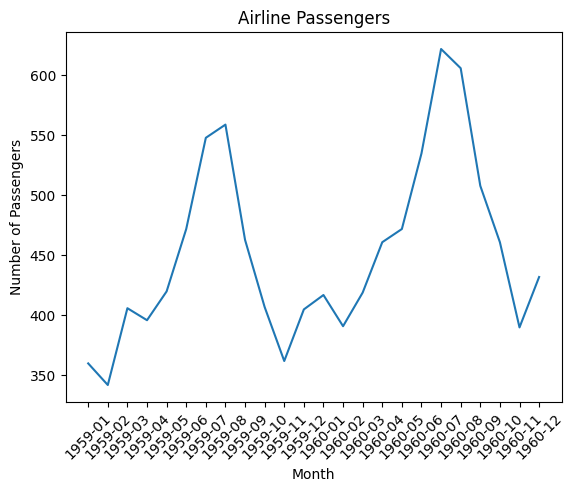

In [ ]:
from matplotlib import pyplot as plt
plt.figsize=(12,4)
plt.plot(labels[-24:],ts[-24:])
plt.xlabel("Month") #add x label
plt.xticks(rotation=45)
plt.ylabel("Number of Passengers") #add y label
plt.title("Airline Passengers") #add title
plt.show()

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['Passengers']])

# Add normalized data to the DataFrame
df['Normalized Passengers'] = normalized_data

# Print the first few rows to verify
print(df.head())


     Month  Passengers  Normalized Passengers
0  1949-01         112               0.015444
1  1949-02         118               0.027027
2  1949-03         132               0.054054
3  1949-04         129               0.048263
4  1949-05         121               0.032819


In [ ]:

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train_data, test_data = train_test_split(normalized_data, test_size=0.3, shuffle=False)

# Print the shapes of the resulting sets to verify the split
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (100, 1)
Test data shape: (44, 1)


In [ ]:

import numpy as np

def create_target_dataset(dataset, timewindow=1):
  """
  Creates a target dataset by shifting the input dataset using numpy roll.

  Args:
      dataset: The input dataset as a NumPy array.
      timewindow: The number of time steps to shift the data.

  Returns:
      A tuple containing the input data and the target data.
  """
  dataX, dataY = [], []
  for i in range(len(dataset)-timewindow-1):
    a = dataset[i:(i+timewindow), 0]
    dataX.append(a)
    dataY.append(dataset[i + timewindow, 0])
  return np.array(dataX), np.array(dataY)

# Example usage with your existing data:
trainX, trainY = create_target_dataset(train_data, timewindow=1)
testX, testY = create_target_dataset(test_data, timewindow=1)

print("TrainX shape:", trainX.shape)
print("TrainY shape:", trainY.shape)
print("TestX shape:", testX.shape)
print("TestY shape:", testY.shape)

TrainX shape: (98, 1)
TrainY shape: (98,)
TestX shape: (42, 1)
TestY shape: (42,)


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the input data for LSTM (samples, time steps, features)
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0453
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0147
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0102
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0102
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028
Epoch 13/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030
Epoch 14/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 15/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031
Epoch 16/100
98/

In [ ]:

from sklearn.metrics import mean_squared_error

# Invert predictions back to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.72 RMSE
Test Score: 53.45 RMSE


In [ ]:

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
#print(df.head())
ts= df['Passengers']
labels=df['Month']

#plt.figsize=(12,4)
#plt.plot(labels[-24:],ts[-24:])
#plt.xlabel("Month") #add x label
#plt.xticks(rotation=45)
#plt.ylabel("Number of Passengers") #add y label
#plt.title("Airline Passengers") #add title
#plt.show()


# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['Passengers']])

# Add normalized data to the DataFrame
df['Normalized Passengers'] = normalized_data

# Print the first few rows to verify
#print(df.head())



# Split data into training and testing sets
train_data, test_data = train_test_split(normalized_data, test_size=0.3, shuffle=False)

# Print the shapes of the resulting sets to verify the split
#print("Train data shape:", train_data.shape)
#print("Test data shape:", test_data.shape)



def create_target_dataset(dataset, timewindow=1):
  """
  Creates a target dataset by shifting the input dataset using numpy roll.

  Args:
      dataset: The input dataset as a NumPy array.
      timewindow: The number of time steps to shift the data.

  Returns:
      A tuple containing the input data and the target data.
  """
  dataX, dataY = [], []
  for i in range(len(dataset)-timewindow-1):
    a = dataset[i:(i+timewindow), 0]
    dataX.append(a)
    dataY.append(dataset[i + timewindow, 0])
  return np.array(dataX), np.array(dataY)

# Example usage with your existing data:
trainX, trainY = create_target_dataset(train_data, timewindow=1)
testX, testY = create_target_dataset(test_data, timewindow=1)

#print("TrainX shape:", trainX.shape)
#print("TrainY shape:", trainY.shape)
#print("TestX shape:", testX.shape)
#print("TestY shape:", testY.shape)


# Reshape the input data for LSTM (samples, time steps, features)
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


# Invert predictions back to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Train Score: 24.27 RMSE
Test Score: 53.67 RMSE


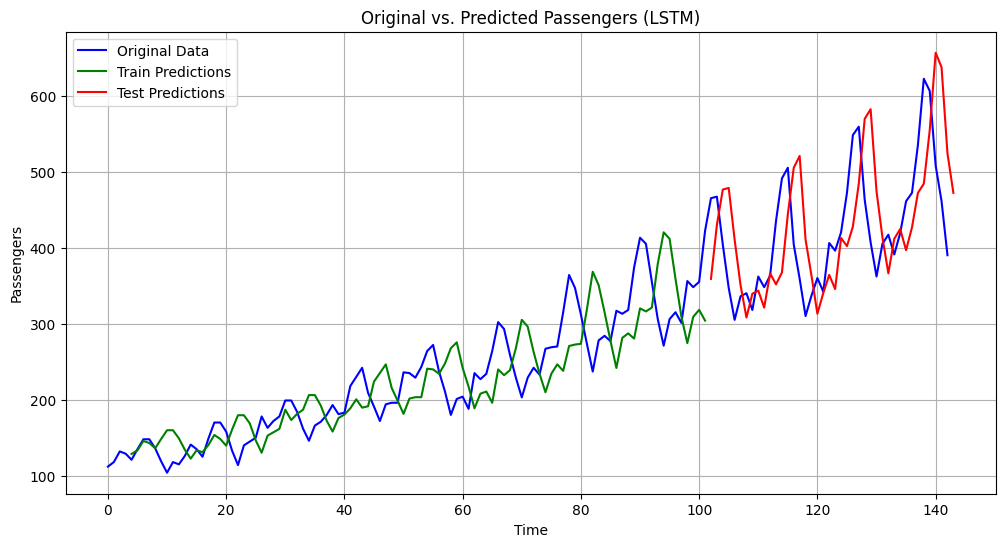

In [ ]:

import matplotlib.pyplot as plt

# Assuming trainY, testY, trainPredict, and testPredict are already defined from your code

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(df['Passengers'][:-1], label='Original Data', color='blue')

# Plot the train predictions
train_plot_start = len(df) - len(trainY[0]) - len(testY[0])
train_plot_end = len(df) - len(testY[0])
plt.plot(range(train_plot_start, train_plot_end), trainPredict[:, 0], label='Train Predictions', color='green')

# Plot the test predictions
test_plot_start = len(df) - len(testY[0])
plt.plot(range(test_plot_start, len(df)), testPredict[:, 0], label='Test Predictions', color='red')


plt.xlabel("Time")
plt.ylabel("Passengers")
plt.title("Original vs. Predicted Passengers (LSTM)")
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.show()